**Name: Atta Ur Rehman**



#*   **Heart Disease Analysis And Prediction**
#*   **Objective: This Project aims to first analyze the dataset & Develop a prediction model for heart disease based on patient data.**




**First Need to import libraries and dataset**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


**Upload Dataset to Google Colab**

In [24]:
df = pd.read_csv('heart_disease.csv')

#**EDA(Exploratory Data Analysis)**

In [25]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [26]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [27]:
df['Age'].fillna(df['Age'].median(), inplace =True)
df['Gender'].fillna('male',inplace = True)
df['Blood Pressure'].fillna(df['Blood Pressure'].median(), inplace =True)
df['Smoking'].replace('Yes',1,inplace = True)
df['Smoking'].replace('No',0,inplace = True)
df['Cholesterol Level'].fillna(df['Cholesterol Level'].median(), inplace =True)
df['Exercise Habits'].fillna('Medium', inplace =True)
df['Smoking'].fillna(df['Smoking'].median(), inplace =True)
df['Family Heart Disease'].replace('Yes',1,inplace = True)
df['Family Heart Disease'].replace('No',0,inplace = True)
df['Family Heart Disease'].fillna(df['Family Heart Disease'].median(), inplace =True)
df['Diabetes'].replace('Yes',1,inplace = True)
df['Diabetes'].replace('No',0,inplace = True)
df['Diabetes'].fillna(df['Diabetes'].median(), inplace =True)
df['BMI'].fillna(df['BMI'].median(), inplace =True)
df['High Blood Pressure'].replace('Yes',1,inplace = True)
df['High Blood Pressure'].replace('No',0,inplace = True)
df['High Blood Pressure'].fillna(df['High Blood Pressure'].median(), inplace =True)
df['Low HDL Cholesterol'].replace('Yes',1,inplace = True)
df['Low HDL Cholesterol'].replace('No',0,inplace = True)
df['Low HDL Cholesterol'].fillna(df['Low HDL Cholesterol'].median(), inplace =True)
df['High LDL Cholesterol'].replace('Yes',1,inplace = True)
df['High LDL Cholesterol'].replace('No',0,inplace = True)
df['High LDL Cholesterol'].fillna(df['High LDL Cholesterol'].median(), inplace =True)
df['Alcohol Consumption'].fillna('Medium', inplace =True)
df['Stress Level'].fillna('Medium', inplace =True)
df['Sleep Hours'].fillna(df['Sleep Hours'].median(), inplace =True)
df['Sugar Consumption'].fillna('Medium', inplace =True)
df['Triglyceride Level'].fillna(df['Triglyceride Level'].median(), inplace =True)
df['Fasting Blood Sugar'].fillna(df['Fasting Blood Sugar'].median(), inplace =True)
df['CRP Level'].fillna(df['CRP Level'].median(), inplace =True)
df['Homocysteine Level'].fillna(df['Homocysteine Level'].median(), inplace =True)
df['Heart Disease Status'].replace('Yes',1,inplace = True)
df['Heart Disease Status'].replace('No',0,inplace = True)

<ipython-input-27-67dc276ed2ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace =True)
<ipython-input-27-67dc276ed2ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  float64
 6   Family Heart Disease  10000 non-null  float64
 7   Diabetes              10000 non-null  float64
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  float64
 10  Low HDL Cholesterol   10000 non-null  float64
 11  High LDL Cholesterol  10000 non-null  float64
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

In [29]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,49.295400,149.758200,225.427300,0.514800,0.497500,0.495200,29.077274,0.504800,0.502500,0.493800,6.991359,250.732500,120.141900,7.472200,12.456177,0.20000
std,18.167574,17.556268,43.510401,0.499806,0.500019,0.500002,6.300156,0.500002,0.500019,0.499987,1.751002,86.953962,23.558053,4.334601,4.319100,0.40002
min,18.000000,120.000000,150.000000,0.000000,0.000000,0.000000,18.002837,0.000000,0.000000,0.000000,4.000605,100.000000,80.000000,0.003647,5.000236,0.00000
25%,34.000000,134.000000,187.000000,0.000000,0.000000,0.000000,23.668887,0.000000,0.000000,0.000000,5.455288,176.000000,99.000000,3.681800,8.729771,0.00000
50%,49.000000,150.000000,226.000000,1.000000,0.000000,0.000000,29.079492,1.000000,1.000000,0.000000,7.003252,250.000000,120.000000,7.472164,12.409395,0.00000
75%,65.000000,165.000000,263.000000,1.000000,1.000000,1.000000,34.509009,1.000000,1.000000,1.000000,8.527938,326.000000,141.000000,11.244879,16.130968,0.00000
max,80.000000,180.000000,300.000000,1.000000,1.000000,1.000000,39.996954,1.000000,1.000000,1.000000,9.999952,400.000000,160.000000,14.997087,19.999037,1.00000


**How Much of Patients Are Effected by Heart Disease and how much aren't**

<ipython-input-30-fcc8101a5a73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease Status", data=df, palette="Oranges")


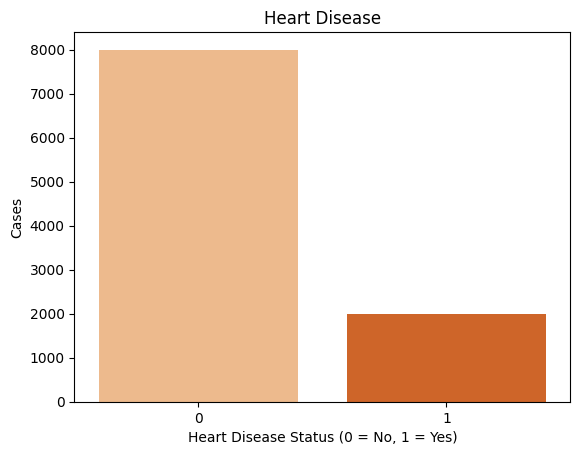

In [30]:
sns.countplot(x="Heart Disease Status", data=df, palette="Oranges")
plt.title("Heart Disease")
plt.xlabel("Heart Disease Status (0 = No, 1 = Yes)")
plt.ylabel("Cases")
plt.show()

**time to see distribution of values**

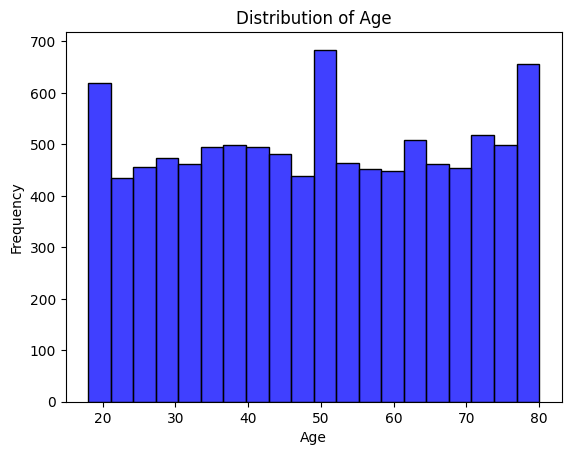

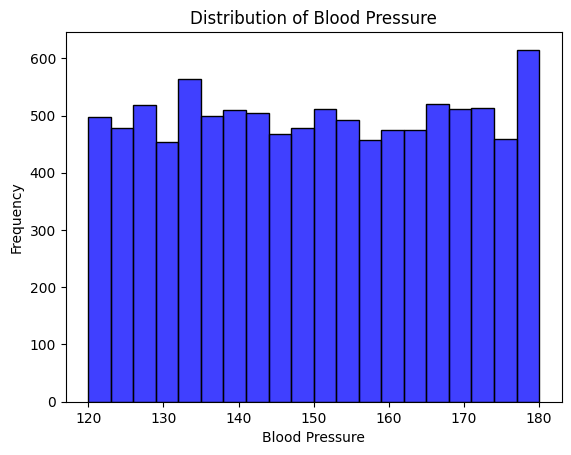

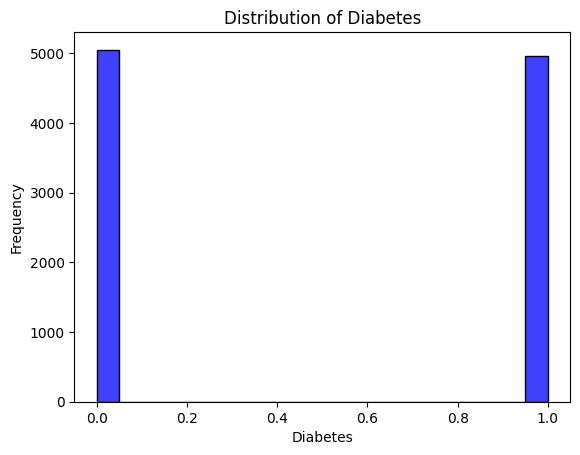

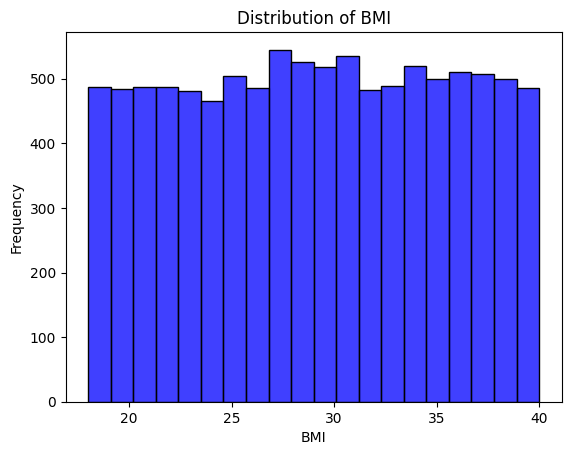

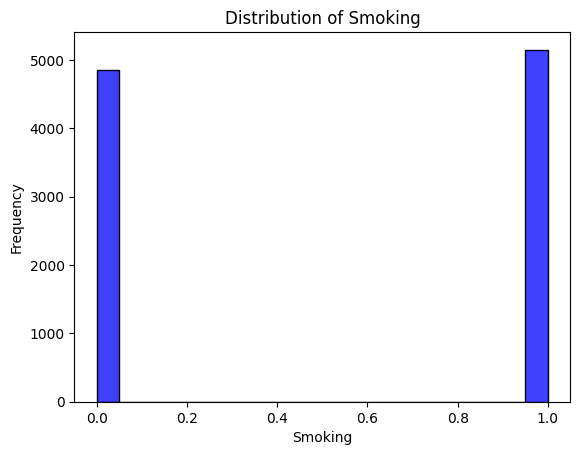

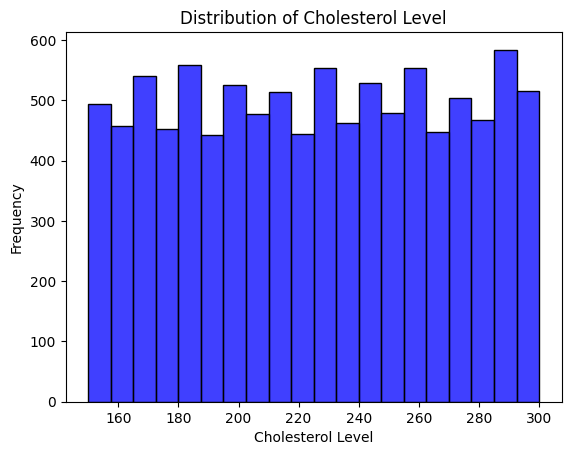

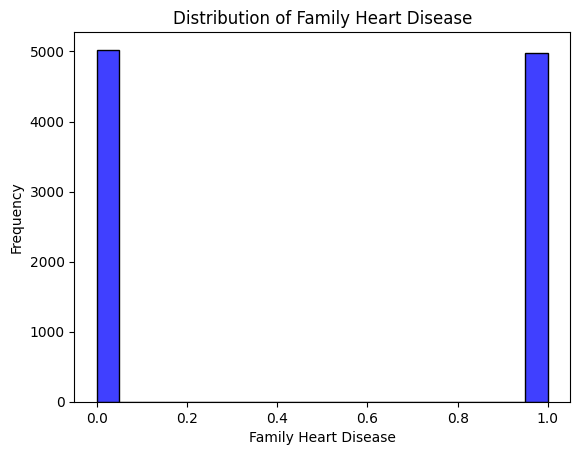

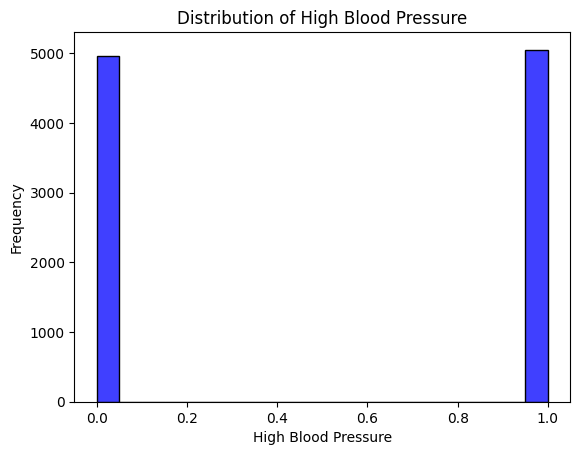

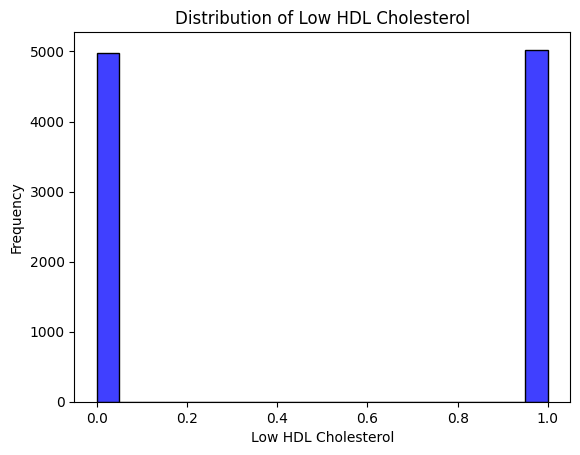

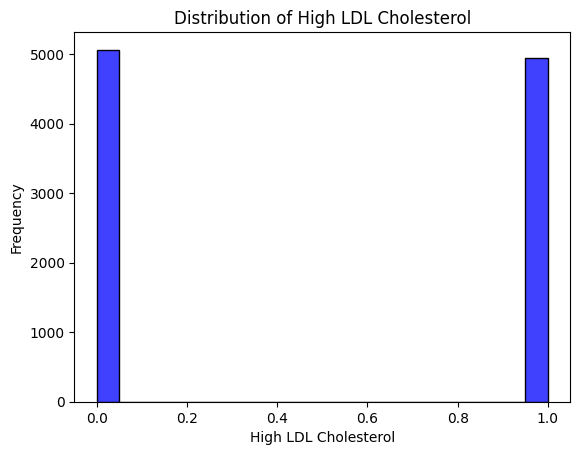

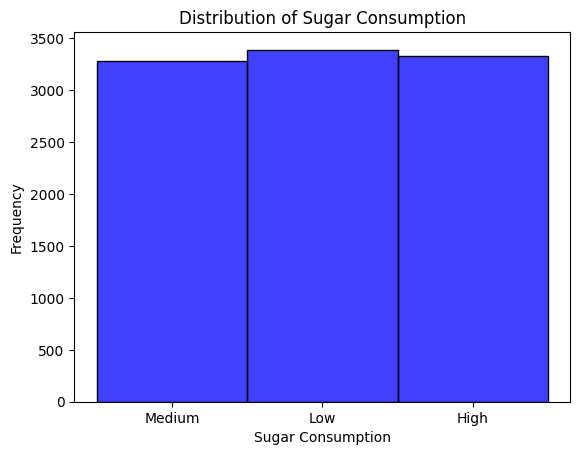

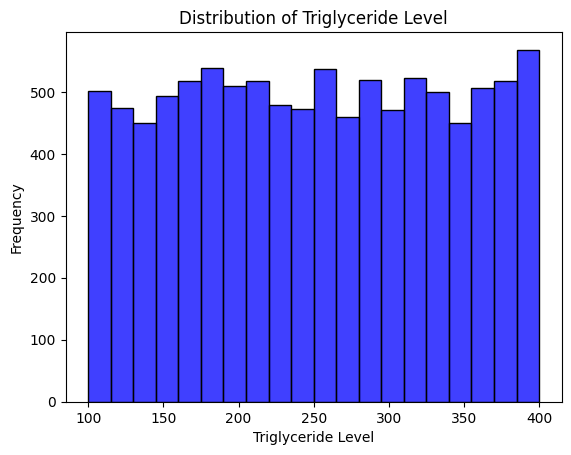

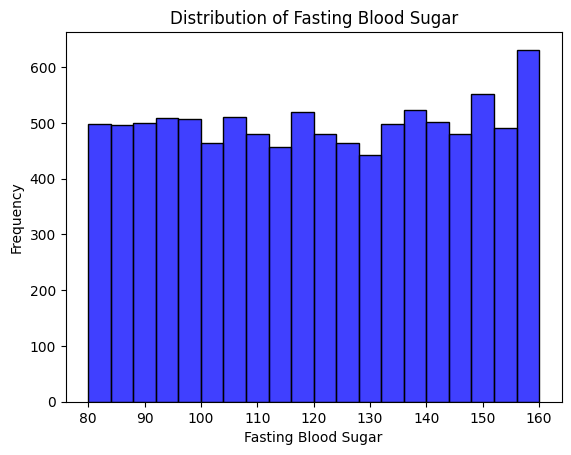

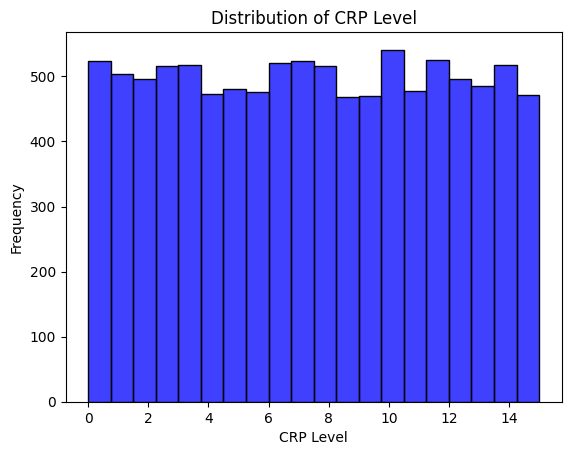

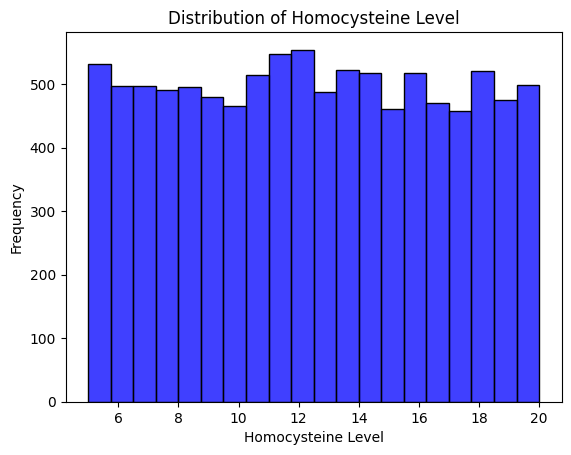

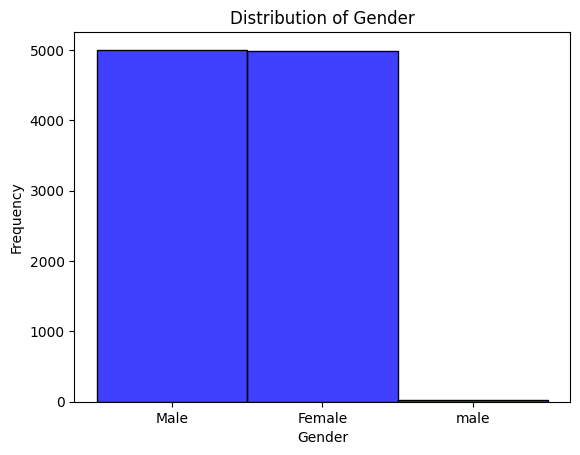

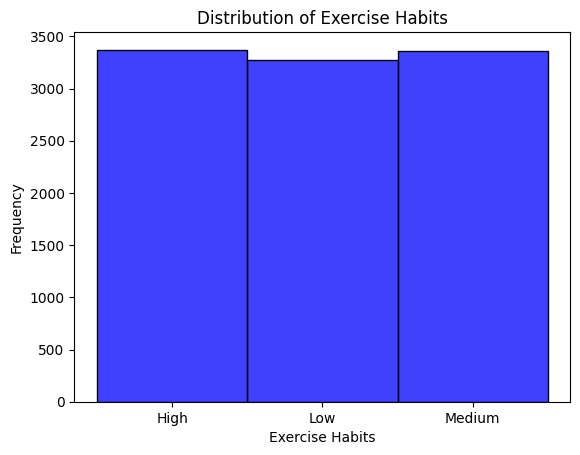

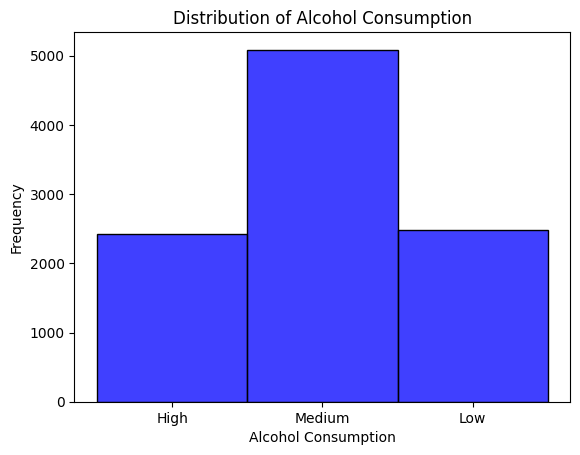

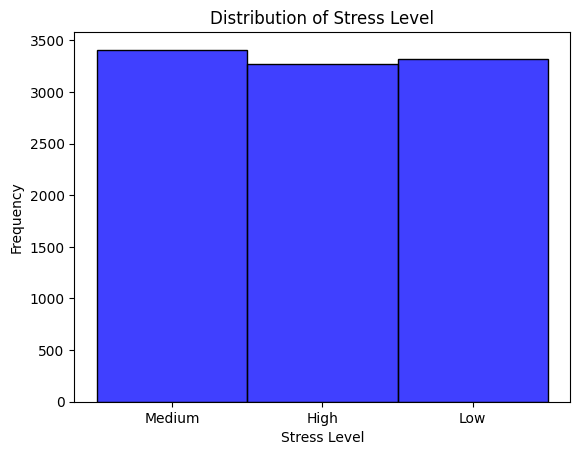

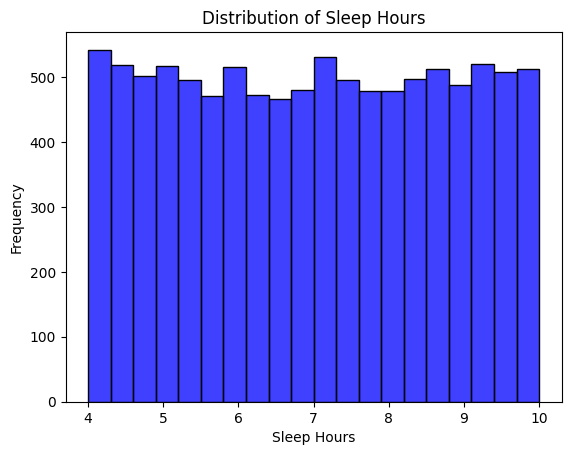

In [31]:
features = ['Age', 'Blood Pressure', 'Diabetes', 'BMI', 'Smoking','Cholesterol Level','Family Heart Disease','High Blood Pressure','Low HDL Cholesterol','High LDL Cholesterol','Sugar Consumption','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level','Gender', 'Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours']

for f in features:
    sns.histplot(df[f], bins=20, color='blue')
    plt.title(f"Distribution of {f}")
    plt.xlabel(f)
    plt.ylabel("Frequency")
    plt.show()


#**Data Analysis**

**First Need to see which age group has most Heart Diseases**

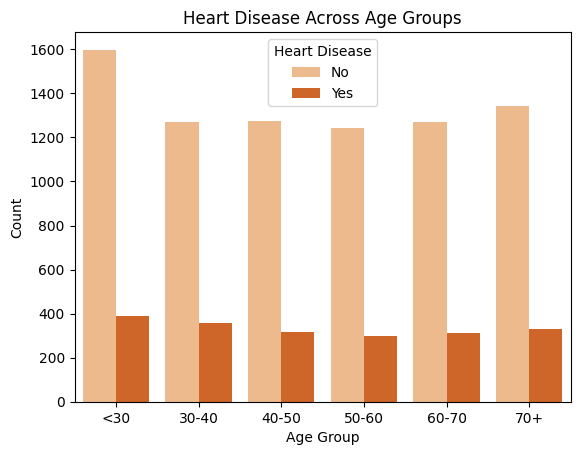

In [32]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 100],
                           labels=["<30", "30-40", "40-50", "50-60", "60-70", "70+"])

sns.countplot(x='age_group', hue='Heart Disease Status', data=df, palette='Oranges')
plt.title("Heart Disease Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

**People with less then age 30 has Most heart diseases**

**Then need to see Blood Pressure relation with heart Disease, whether increase in Blood Pressure increases heart diseases or not**

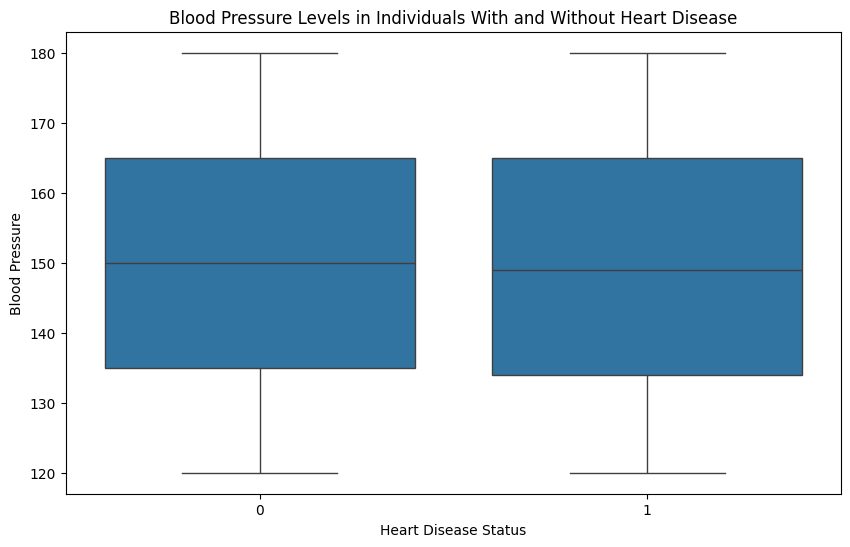

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Disease Status', y='Blood Pressure', data=df)
plt.title('Blood Pressure Levels in Individuals With and Without Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Blood Pressure')

plt.show()

**Blood Pressure Doesn't Have Significant effect on heart disease**

**Then we need to see whether Exercise decreases the heart diseases or not.**

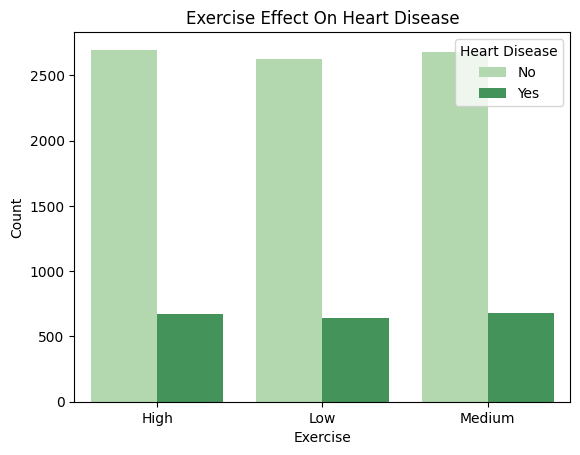

In [34]:
sns.countplot(x = 'Exercise Habits',hue ='Heart Disease Status', data=df, palette='Greens')
plt.title("Exercise Effect On Heart Disease")
plt.xlabel("Exercise")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

**So Doing more Exercise decrease Heart Disease and We need to do Exercise to prevent Heart Disease.**

**Then need to see Stress Level Relation With Heart Disease**

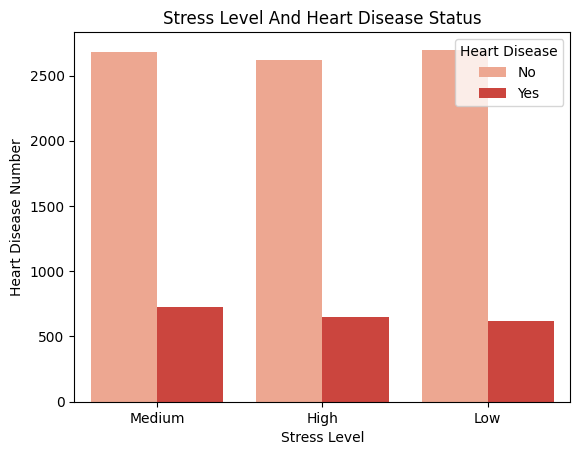

In [35]:
sns.countplot(x = 'Stress Level',hue ='Heart Disease Status', data=df, palette='Reds')
plt.title("Stress Level And Heart Disease Status")
plt.xlabel("Stress Level")
plt.ylabel("Heart Disease Number")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

**So Higher Stress Level Increase Heart Disease And Low Stress Level Decrease heart Disease So A person shouldn't take much Stress.**

**Next, We Need To see Alcohol and Smoking Effect On Heart Disease.**

<ipython-input-36-e7b4f157816a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i, y='Heart Disease Status', data=df, ci=None)


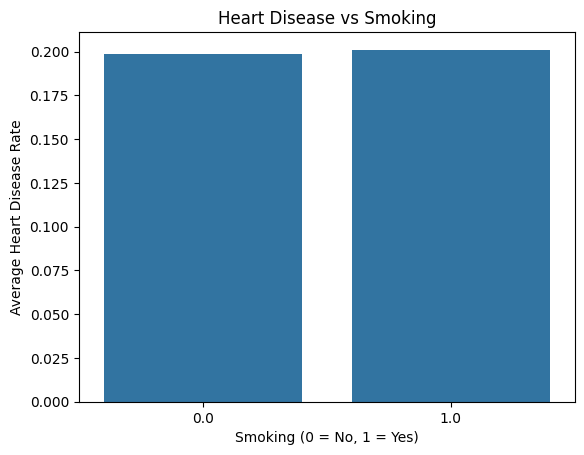

<ipython-input-36-e7b4f157816a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i, y='Heart Disease Status', data=df, ci=None)


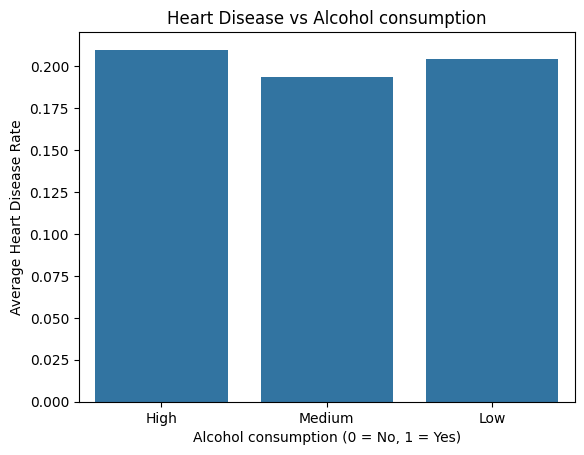

In [36]:
for i in ['Smoking', 'Alcohol Consumption']:
    sns.barplot(x=i, y='Heart Disease Status', data=df, ci=None)
    plt.title(f"Heart Disease vs {i.capitalize()}")
    plt.xlabel(f"{i.capitalize()} (0 = No, 1 = Yes)")
    plt.ylabel("Average Heart Disease Rate")
    plt.show()

**So Smoking and Alcohol Does Increase Heart Disease Chance and A Person Should Prevent These For A better Life.**

**Lets see Diabetes Relation With Heart Disease**

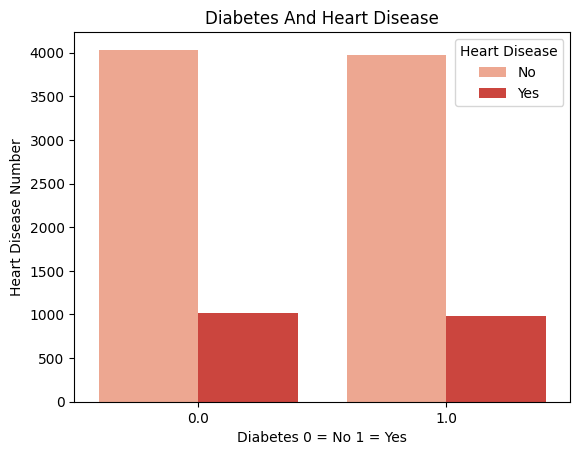

In [37]:
sns.countplot(x = 'Diabetes',hue ='Heart Disease Status', data=df, palette='Reds')
plt.title("Diabetes And Heart Disease")
plt.xlabel("Diabetes 0 = No 1 = Yes")
plt.ylabel("Heart Disease Number")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

#**Prediction Model**

**First need to drop extra and non-numerical Columns**

In [38]:
ctd = ['Gender', 'Exercise Habits' ,'Alcohol Consumption','BMI','High Blood Pressure','age_group',	'Stress Level', 'Sugar Consumption']
df1 = df.drop(columns=ctd,axis = 1)

**Then take Heart Disease Status As Our Output and All other columns as our input for Prediction Model.**

In [39]:
X = df1.drop('Heart Disease Status', axis=1)
y = df1['Heart Disease Status']

**The Dataset isn't balanced so need to balance this by Synthetic Minority Over-sampling Technique**

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Then split the dataset into 2 parts with propotion of 80:20 to train and test the model. 80% will be use for training while 20% will be used to testing**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Then import the random forest model. Use standerscaler to scale the input to make it better for our model. Then used the model and used 100 random forests and fit it. In the end, saw the classificaton report**

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1604
           1       1.00      0.72      0.83      1596

    accuracy                           0.86      3200
   macro avg       0.89      0.86      0.85      3200
weighted avg       0.89      0.86      0.85      3200



**Time to ready our input to test the model**

In [43]:

new_data = pd.DataFrame({
    'Age': [60],
    'Blood Pressure': [256],
    'Cholesterol Level': [242],
    'Smoking' : [1],
    'Family Heart Disease': [1],
    'Diabetes' : [1],
    'Low HDL Cholesterol': [1],
    'High LDL Cholesterol': [1],
    'Sleep Hours' : [3],
    'Triglyceride Level' : [362],
    'Fasting Blood Sugar' : [254],
    'CRP Level' : [10.3],
    'Homocysteine Level' : [8]


})

**Predict the new input we made using the model we trained.**

In [44]:
rf_model.predict(new_data)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])